##### _Data Visualization with Python_
---

# Box Plot (Box-and-Whisker Plot)

A box plot, also known as a box-and-whisker plot, is a standardized way of displaying the distribution of numerical data based on five key summary statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It provides a concise visual summary of the central tendency, spread, and skewness of a dataset, and also highlights potential outliers.

### Suitable Variable Types
* **Numerical (Interval or Ratio):** Box plots are designed for visualizing the distribution of a single numerical variable.
* **Categorical (Optional, for Comparisons):** Box plots are *very* useful for comparing the distributions of a numerical variable *across different categories*. You can create multiple box plots side-by-side, one for each category.

### Use Cases
1. **Summarizing a Distribution:** Quickly see the central tendency (median), spread (IQR and range), and skewness of a dataset.
2. **Comparing Distributions:**  The primary use case is comparing the distributions of a numerical variable across different groups or categories.  For example:
    * Comparing test scores of students in different classes.
    * Comparing the salaries of employees in different departments.
    * Comparing the response times of different servers.
3. **Identifying Outliers:** Box plots clearly identify potential outliers, which are data points that fall far outside the main pattern of the data.
4. **Assessing Symmetry and Skewness:** The position of the median within the box and the lengths of the whiskers provide information about the symmetry or skewness of the distribution.
5. **Checking Normality:** While not a definitive test, box plots can give you a visual to check if your data is normally distributed.

### Anatomy of a Box Plot
A box plot consists of the following components:

* **Box:** The box itself represents the interquartile range (IQR), which contains the middle 50% of the data (from Q1 to Q3).
* **Line inside the box:** Represents the median (Q2).
* **Whiskers:** Lines extending from the box. They typically extend to the minimum and maximum values *within* 1.5 * IQR of the quartiles.
    * **Lower Whisker:** Extends from Q1 to the smallest data point that is greater than or equal to (Q1 - 1.5 * IQR).
    * **Upper Whisker:** Extends from Q3 to the largest data point that is less than or equal to (Q3 + 1.5 * IQR).
* **Individual Points (Outliers):** Data points that fall outside the whiskers (i.e., below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR) are plotted as individual points. These are considered potential outliers.
* **IQR (Interquartile Range):**  IQR = Q3 - Q1.

### Potential Pitfalls
1. **Hiding the Underlying Distribution:** A box plot summarizes the data, but it *doesn't* show the full distribution.  Two datasets with very different shapes (e.g., bimodal vs. uniform) could have similar box plots.  Consider using a histogram or violin plot *in addition to* a box plot to reveal the full distribution.
2. **Misinterpreting Outliers:**  Outliers identified by a box plot are *potential* outliers based on a specific rule (1.5 * IQR). They are not necessarily errors or invalid data points.  Always investigate outliers to understand *why* they are different.
3. **Small Sample Sizes:** Box plots can be misleading with very small sample sizes. The quartiles and median may not be reliable estimates of the population parameters.
4. **Assuming Normality:**  The 1.5 * IQR rule for outlier detection is based on the assumption of a normal distribution.  If the data is highly non-normal, this rule might flag too many or too few points as outliers.

### How to Create Box Plots?

#### Creating a Dummy Database:

In [2]:
import pandas as pd
import numpy as np

# --- Synthetic Data: Salaries by Department ---
np.random.seed(42)
n = 100  # Number of employees per department
departments = ['Engineering', 'Sales', 'Marketing', 'HR', 'Finance']
n_departments = len(departments)

# Simulate salaries with different means and standard deviations for each department
data = {
    'Department': np.repeat(departments, n),  # Repeat each department name n times
    'Salary': np.concatenate([
        np.random.normal(loc=80000, scale=15000, size=n),  # Engineering
        np.random.normal(loc=65000, scale=10000, size=n),  # Sales
        np.random.normal(loc=60000, scale=9000, size=n),   # Marketing
        np.random.normal(loc=55000, scale=8000, size=n),   # HR
        np.random.normal(loc=90000, scale=18000, size=n)   # Finance
    ])
}
df_salaries = pd.DataFrame(data)
df_salaries['Salary'] = df_salaries['Salary'].clip(20000, 200000).astype(int) # Ensure the salaries are within reasonable range.

df_salaries.head()

,Department,Salary
0,Engineering,87450
1,Engineering,77926
2,Engineering,89715
3,Engineering,102845
4,Engineering,76487


#### Box Plots with Matplotlib:

/var/folders/tp/8wnc6rdn5t92sctj6slch1pw0000gn/T/ipykernel_26116/1863514481.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salary_by_dept, labels=departments, showmeans=True, patch_artist=True,


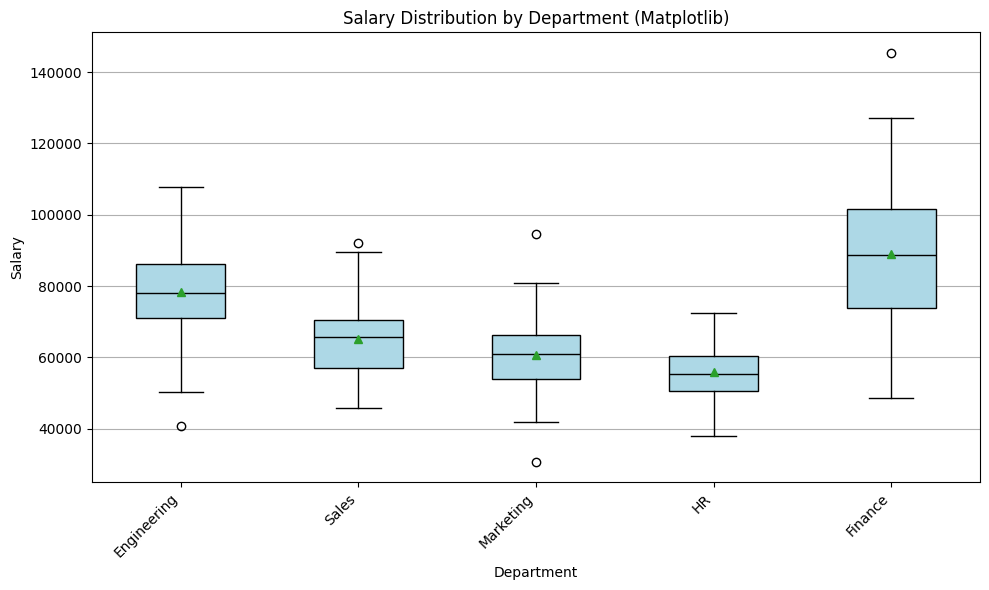

In [3]:
import matplotlib.pyplot as plt

# --- Matplotlib ---

# Create a list of salaries for each department (for Matplotlib's boxplot)
salary_by_dept = [df_salaries['Salary'][df_salaries['Department'] == dept] for dept in departments]

plt.figure(figsize=(10, 6))
plt.boxplot(salary_by_dept, labels=departments, showmeans=True, patch_artist=True,
            medianprops={'color': 'black'},  # Customize median line
            boxprops={'facecolor': 'lightblue', 'edgecolor': 'black'},  # Customize box
            whiskerprops={'color': 'black'},
            capprops={'color': 'black'}) # Customize caps

plt.title('Salary Distribution by Department (Matplotlib)')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Box Plots with Seaborn:

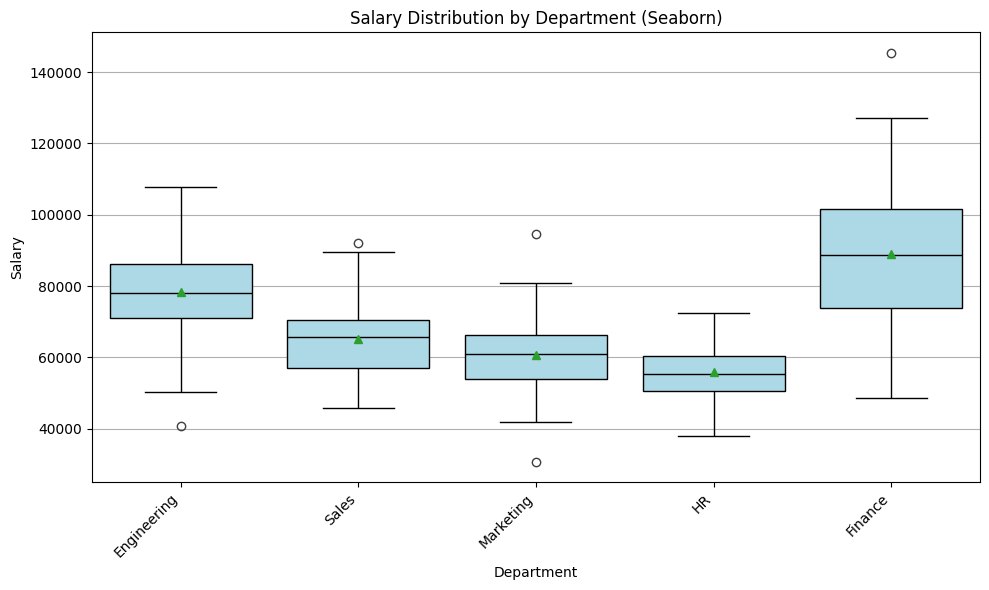

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Seaborn ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df_salaries, showmeans=True,
            medianprops={'color': 'black'},  # Customize median line
            boxprops={'facecolor': 'lightblue', 'edgecolor': 'black'},  # Customize box
            whiskerprops={'color': 'black'},
            capprops={'color': 'black'})

plt.title('Salary Distribution by Department (Seaborn)')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()